If you are running on HPC, Please specify all packages here as a jupyter notebook install or module load

In [ ]:
# !module load anaconda/2021.11
# !module load cuda/12.2
# !nvidia-smi
# !nvcc --version

In [1]:
## Specify your pip install and module load here
import numpy as np
import json

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data

import torchvision.utils
from torchvision import models
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torchvision.models import vgg16
import matplotlib.pyplot as plt

In [2]:
## Your potential Task:
##Your Package imported

## For your reference, here is the package I am using

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import pandas as pd


Load Cifar 10 dataset

In [3]:
# You can also write your own data loading code

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 170M/170M [00:23<00:00, 7.34MB/s]


**Clarify the architecture1 you are using:  model (VGG, ResNet, even Vision Transformer)**

In [4]:
## Your task: Complete your architecture
## Code Starting Here

"""I am just copy and pasting what I had in Assignment 2 as my victim model, since the assignment required to use the same model. """

####

'I am just copy and pasting what I had in Assignment 2 as my victim model, since the assignment required to use the same model. '

Your Training Code

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
## Code Starting Here

# Load the VGG16 model and modify for CIFAR-10
model = vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, 10) # Because CIFAR-10 data has 10 classes

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
model.to(device)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        if i % 100 == 99:
            avg_loss = running_loss / 100
            acc = 100.0 * correct / total
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloader)}] Loss: {avg_loss:.3f}, Accuracy: {acc:.2f}%')
            running_loss = 0.0
    train_losses.append(avg_loss)
    train_accuracies.append(acc)

####
####


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 221MB/s]


Epoch [1/10], Step [100/782] Loss: 1.339, Accuracy: 52.81%
Epoch [1/10], Step [200/782] Loss: 0.841, Accuracy: 61.91%
Epoch [1/10], Step [300/782] Loss: 0.729, Accuracy: 66.32%
Epoch [1/10], Step [400/782] Loss: 0.640, Accuracy: 69.36%
Epoch [1/10], Step [500/782] Loss: 0.597, Accuracy: 71.45%
Epoch [1/10], Step [600/782] Loss: 0.599, Accuracy: 72.78%
Epoch [1/10], Step [700/782] Loss: 0.540, Accuracy: 74.02%
Epoch [2/10], Step [100/782] Loss: 0.437, Accuracy: 85.33%
Epoch [2/10], Step [200/782] Loss: 0.443, Accuracy: 85.09%
Epoch [2/10], Step [300/782] Loss: 0.438, Accuracy: 85.03%
Epoch [2/10], Step [400/782] Loss: 0.422, Accuracy: 85.11%
Epoch [2/10], Step [500/782] Loss: 0.420, Accuracy: 85.19%
Epoch [2/10], Step [600/782] Loss: 0.415, Accuracy: 85.21%
Epoch [2/10], Step [700/782] Loss: 0.378, Accuracy: 85.53%
Epoch [3/10], Step [100/782] Loss: 0.296, Accuracy: 89.38%
Epoch [3/10], Step [200/782] Loss: 0.311, Accuracy: 89.48%
Epoch [3/10], Step [300/782] Loss: 0.304, Accuracy: 89.5

Your Testing Code

In [6]:
## Code Starting Here
test_accuracies = []

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_accuracy = 100 * correct / total
test_accuracies.append(test_accuracy)


print(f'Accuracy of the network on the test images: {100 * correct / total:.2f} %')

####

Accuracy of the network on the test images: 87.50 %


Save Your Model

In [7]:
torch.save(model.state_dict(), './model_architecture_1.pth')

## Save your log file and upload to Canvas
# Your Code Here

###

**Clarify the architecture2 you are using:  Input -> Conv Layer 1 -> Max Pooling -> Conv Layer 2 -> Max Pooling -> Conv Layer 3 -> Max Pooling -> Flatten -> FC1 -> FC2 -> Output**

In [8]:
## Your task: Complete your architecture
## Code Starting Here

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        # Max Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # FC layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

###



model = MyCNN()
print(model)
####

MyCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


If you successfully write your model architecture, run the following training code with testing

In [9]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# you can adjust the hyperparameters by yourself
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # use your own learning rate

num_epochs = 3  # use your own epoch
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    # Train
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)


    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

print('Finished Training')

Epoch 1/3, Loss: 1.460, Test Accuracy: 56.33%
Epoch 2/3, Loss: 1.006, Test Accuracy: 67.39%
Epoch 3/3, Loss: 0.794, Test Accuracy: 71.45%
Finished Training


Visualization

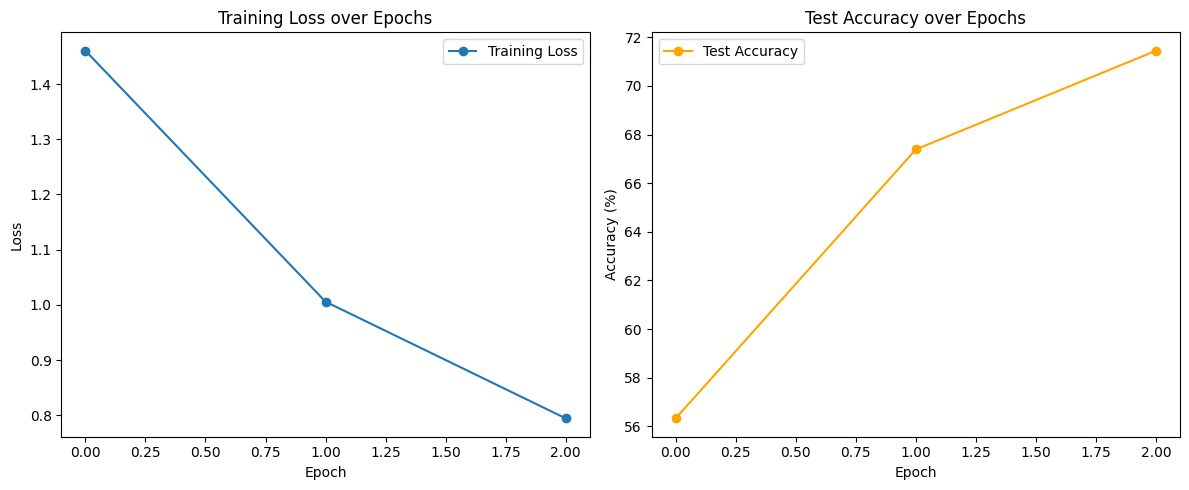

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, marker='o', label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()

# plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, marker='o', color='orange', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

Save Model

In [11]:
torch.save(model.state_dict(), './model_architecture_2.pth')

## Save your log file, and make sure you can load the model as well

## Your saved model can be used in future assignments


Hyperparameter Tuning (you can do manual hyperparameter adjustment as well. No panelty.)

In [ ]:
# !pip install optuna

In [ ]:

## Code Starting Here


####

**Assignment3: Adversarial Example**

0. Load your pre-trained Model

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyCNN().to(device)
model.load_state_dict(torch.load('./model_architecture_2.pth', map_location=device))
model.eval()


classes = testset.classes

Define the Lp distance you would like to use. L2 is recommended.

In [13]:
def compute_lp_distance(perturbation):
    distance = torch.norm(perturbation, p=2, dim=(1, 2, 3))
    return distance

1. Adversarial Example Generation

In [14]:
def generate_adversarial(model, image, label, epsilon, device, alpha=0.01, iters=40):
    # Make a copy so we don't modify the original data.
    adv_image = image.clone().detach().to(device)
    adv_image.requires_grad = True

    # Keep a separate copy of the original image for later use
    ori_image = image.clone().detach().to(device)

    # Define loss
    criterion = nn.CrossEntropyLoss()

    for _ in range(iters):
        adv_image.requires_grad = True

        # Forward pass
        outputs = model(adv_image)
        model.zero_grad()

        # Compute the loss and backprop to get gradients
        cost = criterion(outputs, label)
        cost.backward()

        # Get current gradients
        grad = adv_image.grad.data

        # Step 1: Take a step in the direction of the gradient, normalized by its L2 norm
        # to ensure we move consistently in "direction" space
        grad_norm = torch.norm(grad, p=2, dim=(1, 2, 3), keepdim=True)

        normalized_grad = grad / grad_norm
        adv_image = adv_image + alpha * normalized_grad

        # Step 2: Project the perturbation back onto the L2 ball of radius epsilon
        perturbation = adv_image - ori_image
        perturbation_norm = perturbation.view(perturbation.size(0), -1).norm(dim=1, keepdim=True)

        # If norm of perturbation > epsilon, scale it down to epsilon
        mask = (perturbation_norm.squeeze(1) > epsilon)
        perturbation[mask] = perturbation[mask] * ((epsilon / perturbation_norm.squeeze(1)[mask]).view(-1, 1, 1, 1))


        # Recompute adv_image after projection and clamp to valid pixel range
        adv_image = ori_image + perturbation
        adv_image = torch.clamp(adv_image, 0, 1).detach()

    # Final perturbation and distance
    final_perturbation = adv_image - ori_image
    distance = final_perturbation.view(final_perturbation.size(0), -1).norm(dim=1)

    return adv_image, perturbation, distance

dataiter = iter(testloader)
original, label = next(dataiter)
original, label = original.to(device), label.to(device)

epsilon = 4/225   ## Adjust your own epsilon here

adv_image, perturbation, distance = generate_adversarial(model, original, label, epsilon, device)

global_original = original.detach()
global_adv = adv_image.detach()
global_perturbation = perturbation.detach()


print("adversarial example generated")

adversarial example generated


3. perturbed image Visualization

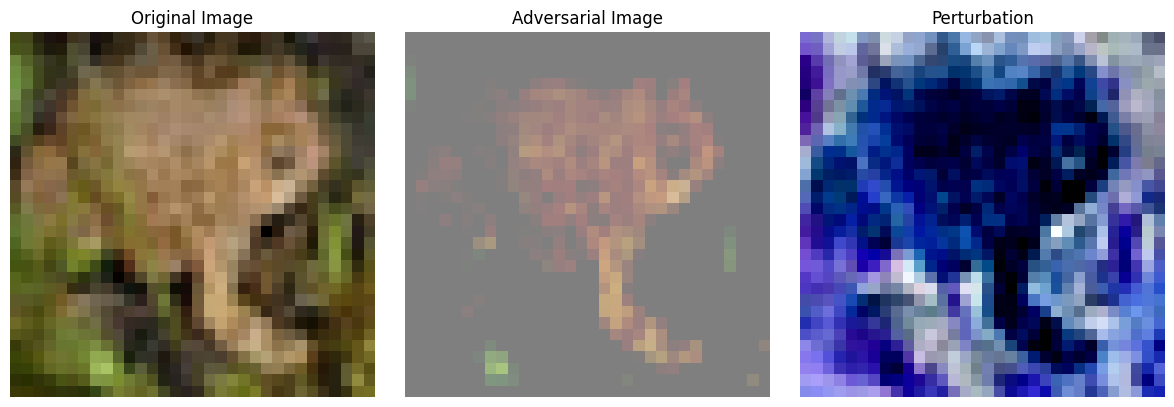

In [15]:
# === visualize_adversarial.py ===
import matplotlib.pyplot as plt
import numpy as np
import torch

def imshow(img):

    img = img.detach().cpu().numpy()
    img = (img * 0.5) + 0.5
    npimg = np.transpose(img, (1, 2, 0))
    return np.clip(npimg, 0, 1)

try:
    global_original
    global_adv
    global_perturbation
except NameError:
    raise NameError("makesure global_original, global_adv, global_perturbation has defined")


orig_img = imshow(global_original[0])
adv_img = imshow(global_adv[0])

pert = global_perturbation[0].detach().cpu().numpy()
pert = (pert - pert.min()) / (pert.max() - pert.min() + 1e-8)
pert = np.transpose(pert, (1, 2, 0))


plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(orig_img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(adv_img)
plt.title("Adversarial Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(pert)
plt.title("Perturbation")
plt.axis('off')

plt.tight_layout()
plt.show()

4. Classification Result

In [16]:
with torch.no_grad():
    output_orig = model(global_original)
    _, pred_orig = torch.max(output_orig.data, 1)
    output_adv = model(global_adv)
    _, pred_adv = torch.max(output_adv.data, 1)

# Ensure the 'classes' variable is defined by reloading it if necessary.
try:
    classes
except NameError:
    classes = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform).classes

print("Original image predicted as:", classes[pred_orig[0].item()])
print("Adversarial image predicted as:", classes[pred_adv[0].item()])

Original image predicted as: frog
Adversarial image predicted as: bird


5. Applying your perturbation to 10 classes and compute the Lp distance as well as its average

In [17]:
EPSILON = 4/255
ALPHA = 0.01
ITERS = 40
classes = ["plane","car","bird","cat","deer","dog","frog","horse","ship","truck"]
adv_images_list = []
perturbations_list = []
distances_list = []

picked_images = []
picked_labels = []
found = [False]*10

# First, we will pick the 10 images one from each class
for images, labels in testloader:
    for i in range(images.size(0)):
        c = labels[i].item()
        if not found[c]:
            picked_images.append(images[i])
            picked_labels.append(labels[i])
            found[c] = True
        if all(found):
            break
    if all(found):
        break

picked_images = torch.stack(picked_images)  # [10, C, H, W]
picked_labels = torch.stack(picked_labels)   # [10]
picked_images, picked_labels = picked_images.to(device), picked_labels.to(device)

adv_images = picked_images.clone().detach()
ori_images = picked_images.clone().detach()
adv_images.requires_grad = True

for i in range(len(picked_images)):
    original = picked_images[i].unsqueeze(0)  # shape [1, 3, 32, 32]
    label = picked_labels[i].unsqueeze(0)     # shape [1]

    adv_image, perturbation, distance = generate_adversarial(model, original, label, EPSILON, device, ALPHA, ITERS)

    adv_images_list.append(adv_image[0].detach())
    perturbations_list.append(perturbation[0].detach())
    distances_list.append(distance)

adv_images = torch.stack(adv_images_list)

print("Adversarial examples generated.")
print(f"L2 distances: {distances_list}")


"""Calculate the average"""
sum = 0
for i in distances_list:
    dist = i[0]
    sum += dist

avg = sum/10
print("Average L2 Distance:", avg)


Adversarial examples generated.
L2 distances: [tensor([25.2162], device='cuda:0'), tensor([24.3440], device='cuda:0'), tensor([20.5887], device='cuda:0'), tensor([13.6894], device='cuda:0'), tensor([23.7380], device='cuda:0'), tensor([15.9921], device='cuda:0'), tensor([18.9026], device='cuda:0'), tensor([26.0391], device='cuda:0'), tensor([24.2582], device='cuda:0'), tensor([18.7979], device='cuda:0')]
Average L2 Distance: tensor(21.1566, device='cuda:0')


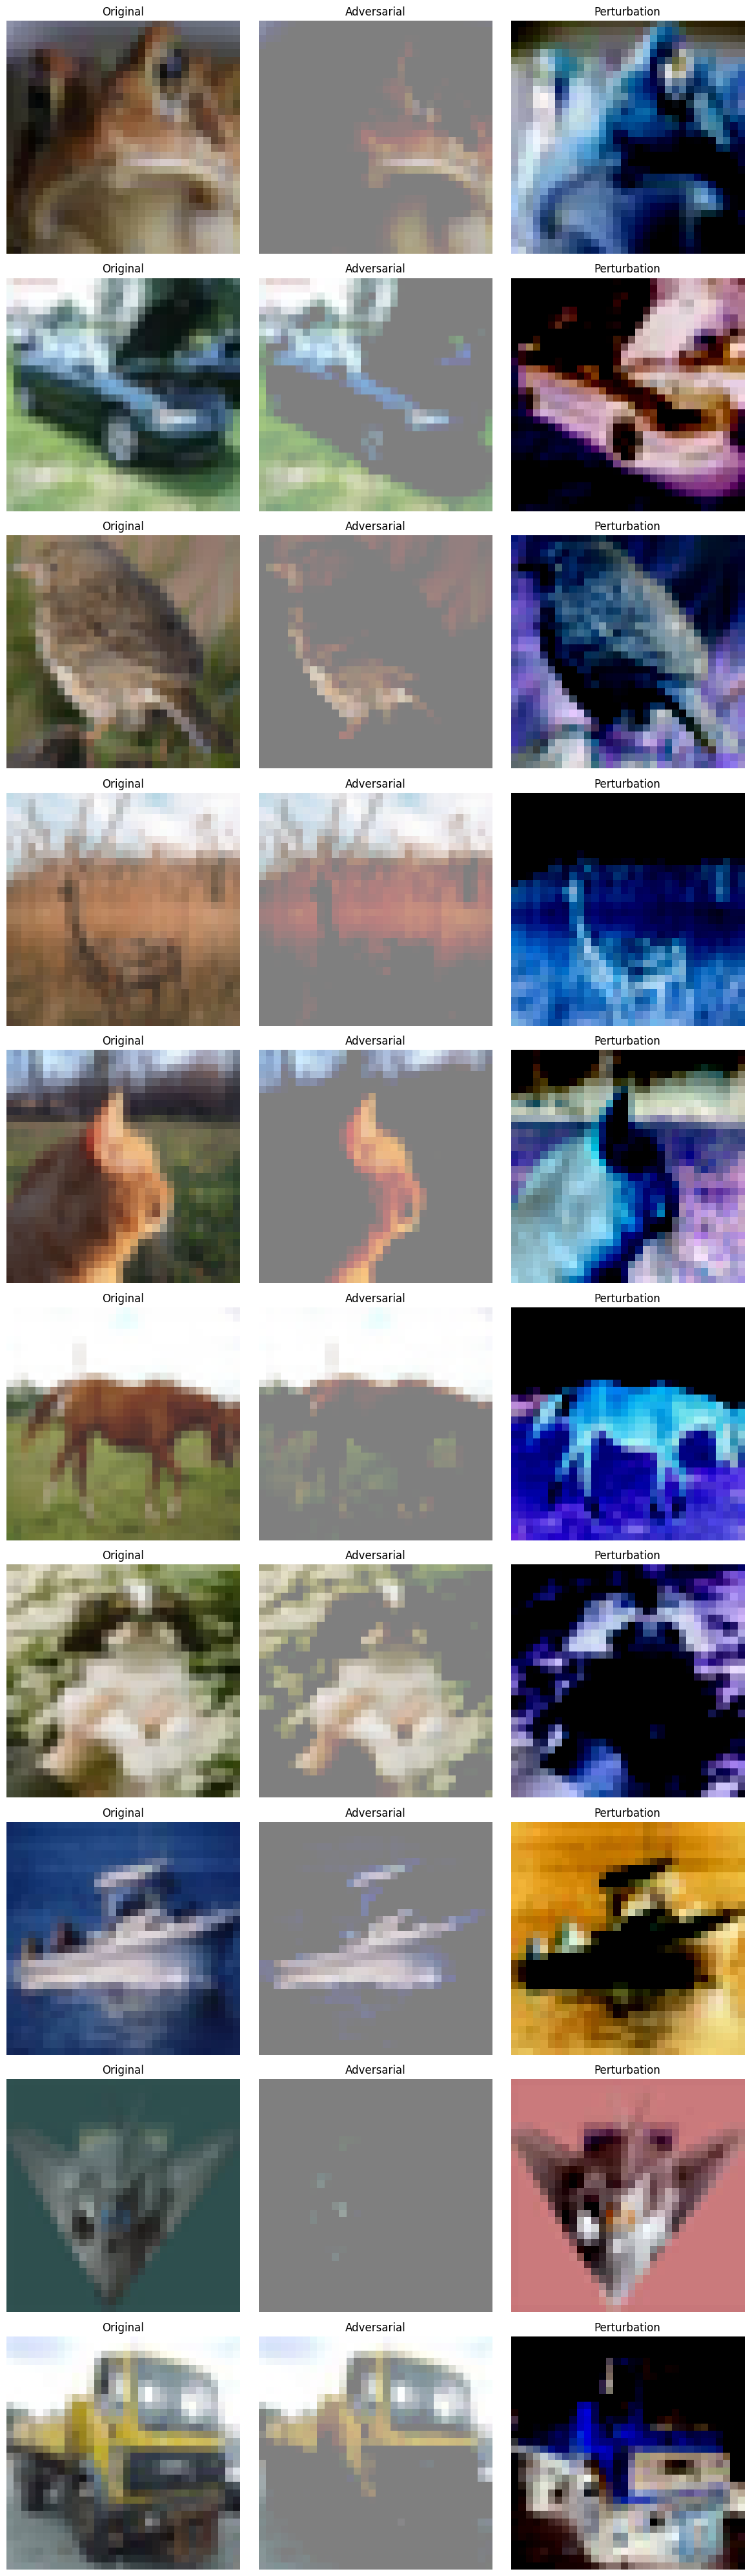

In [18]:
import numpy as np
import matplotlib.pyplot as plt
"""We will copy from previous method and print out all the images that way"""
def imshow(img):
    img = img.detach().cpu().numpy()
    img = (img * 0.5) + 0.5
    npimg = np.transpose(img, (1, 2, 0))
    npimg = np.clip(npimg, 0, 1)
    return npimg

num_images = len(picked_images)
fig, axes = plt.subplots(nrows=num_images, ncols=3, figsize=(12, 4 * num_images))

for i in range(num_images):
    # 1) Original
    orig_img = imshow(picked_images[i])
    axes[i, 0].imshow(orig_img)
    axes[i, 0].set_title("Original")
    axes[i, 0].axis("off")

    # 2) Adversarial
    adv_img = imshow(adv_images_list[i])
    axes[i, 1].imshow(adv_img)
    axes[i, 1].set_title("Adversarial")
    axes[i, 1].axis("off")

    # 3) Perturbation
    pert = perturbations_list[i].detach().cpu().numpy()
    pert_min, pert_max = pert.min(), pert.max()
    pert_norm = (pert - pert_min) / (pert_max - pert_min + 1e-8)
    pert_norm = np.transpose(pert_norm, (1, 2, 0))

    axes[i, 2].imshow(pert_norm)
    axes[i, 2].set_title("Perturbation")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()


In [19]:
"""Now we will print out the attack labels for evaluation"""

import torch

model.eval()

# Pass original images through the model
with torch.no_grad():
    logits_original = model(picked_images)   # shape [10, num_classes]
    predicted_labels_original = logits_original.argmax(dim=1)  # shape [10]

# Pass adversarial images through the model
with torch.no_grad():
    logits_adv = model(adv_images)          # shape [10, num_classes]
    predicted_labels_adv = logits_adv.argmax(dim=1)            # shape [10]

# Print results
print("Comparison of Original vs Adversarial Predictions:\n")
for i in range(len(picked_images)):
    true_label = picked_labels[i].item()
    pred_orig = predicted_labels_original[i].item()
    pred_adv  = predicted_labels_adv[i].item()

    print(f"Image {i}:")
    print(f"  True Label:              {classes[true_label]} ({true_label})")
    print(f"  Predicted (Original):    {classes[pred_orig]} ({pred_orig})")
    print(f"  Predicted (Adversarial): {classes[pred_adv]} ({pred_adv})")
    print("-" * 50)

Comparison of Original vs Adversarial Predictions:

Image 0:
  True Label:              frog (6)
  Predicted (Original):    cat (3)
  Predicted (Adversarial): ship (8)
--------------------------------------------------
Image 1:
  True Label:              car (1)
  Predicted (Original):    car (1)
  Predicted (Adversarial): bird (2)
--------------------------------------------------
Image 2:
  True Label:              bird (2)
  Predicted (Original):    frog (6)
  Predicted (Adversarial): bird (2)
--------------------------------------------------
Image 3:
  True Label:              deer (4)
  Predicted (Original):    horse (7)
  Predicted (Adversarial): ship (8)
--------------------------------------------------
Image 4:
  True Label:              cat (3)
  Predicted (Original):    horse (7)
  Predicted (Adversarial): bird (2)
--------------------------------------------------
Image 5:
  True Label:              horse (7)
  Predicted (Original):    horse (7)
  Predicted (Adversarial): 

In [ ]:
"""Ciataions: PGD l2 code from github repo: https://github.com/Harry24k/PGD-pytorch. """

'Ciataions: PGD l2 code from github repo: https://github.com/Harry24k/PGD-pytorch. '

In [ ]:
"""More cifar-10 pgd implementation from repo: https://github.com/ndb796/Pytorch-Adversarial-Training-CIFAR"""

'More cifar-10 pgd implementation from repo: https://github.com/ndb796/Pytorch-Adversarial-Training-CIFAR'

Grading

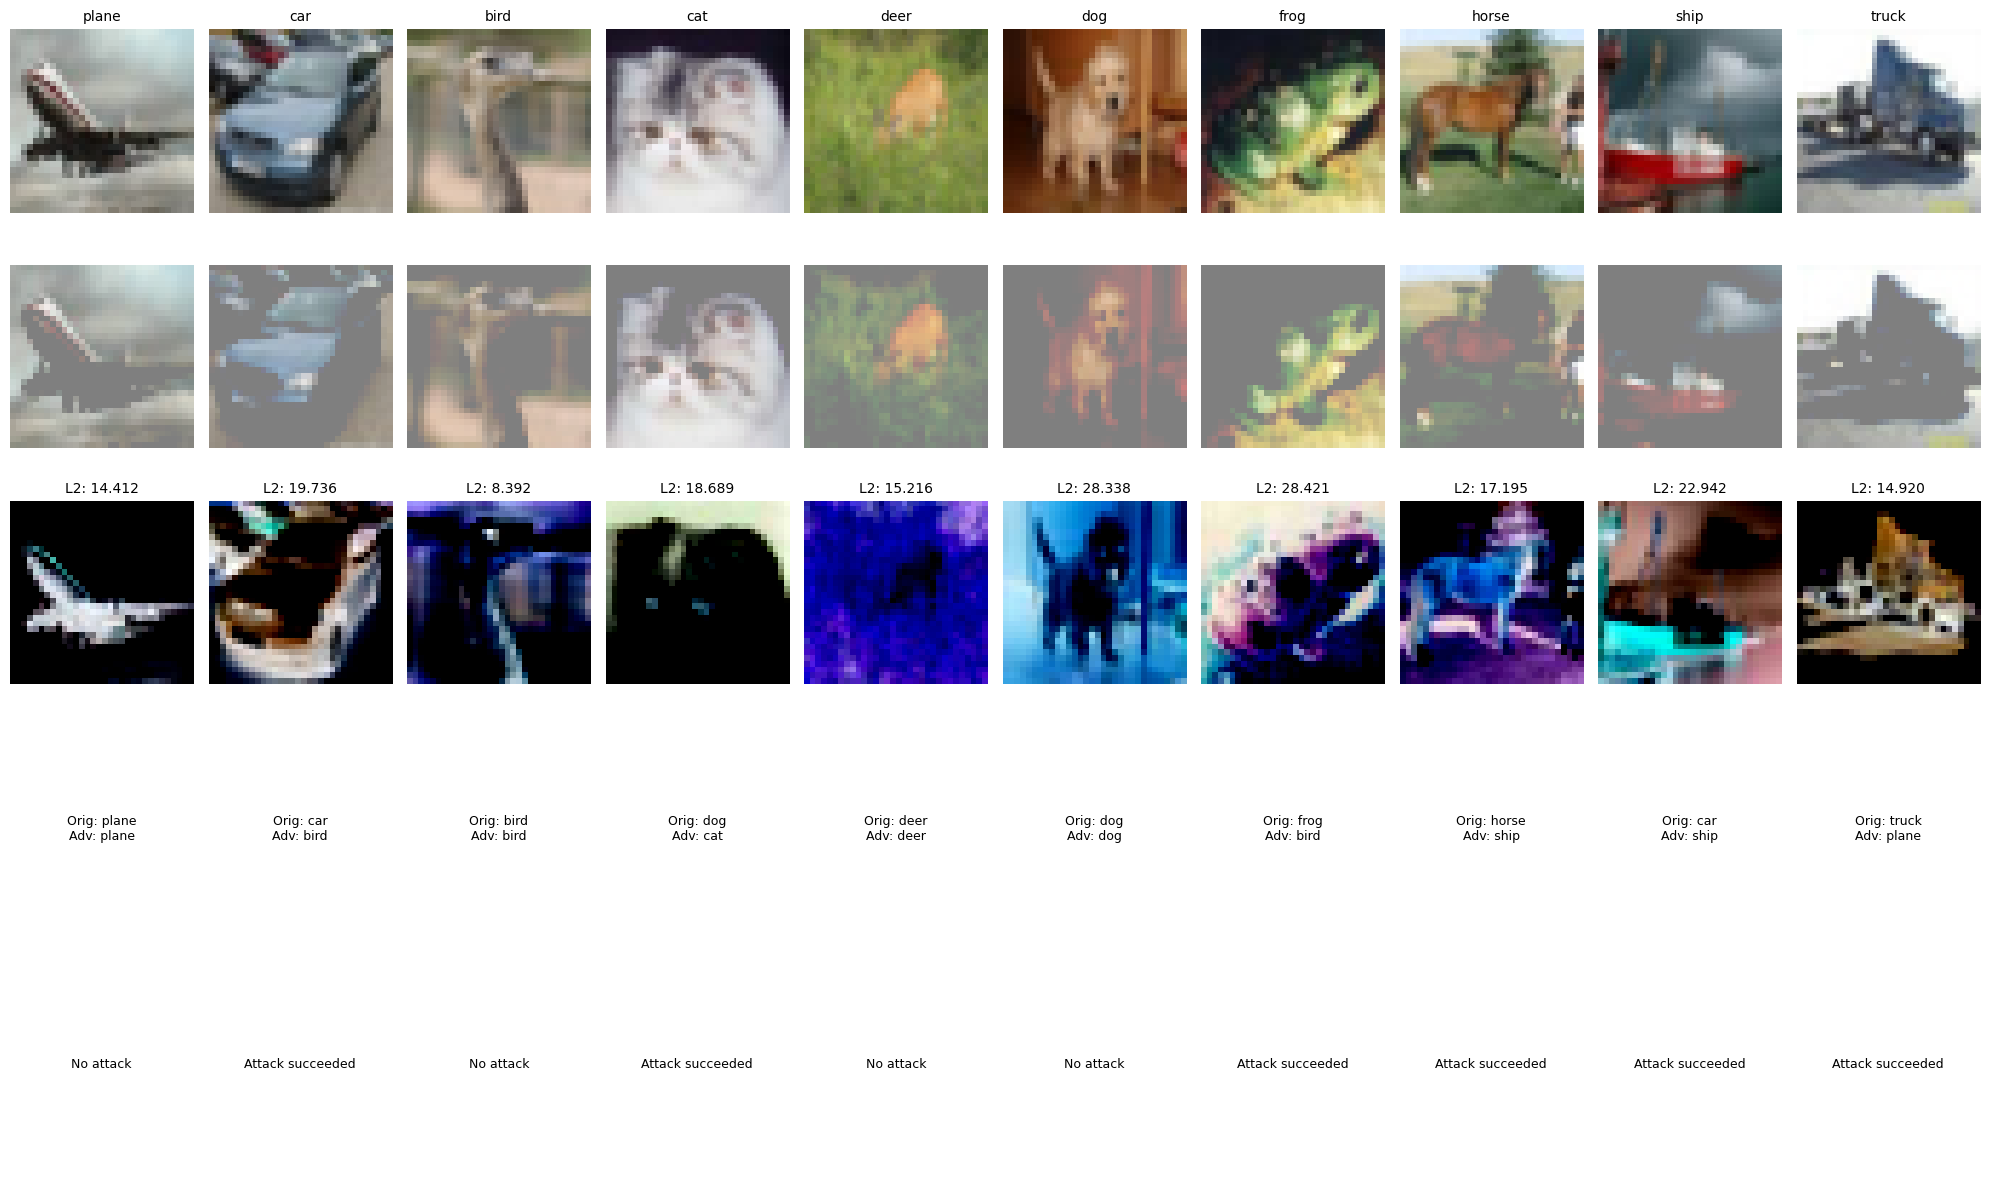

In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch

# Fix random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Group indices for each class from the testset
class_indices = {i: [] for i in range(10)}
for idx, (img, label) in enumerate(testset):
    class_indices[label].append(idx)

# Randomly select one index per class using the fixed random seed
selected_indices = {}
for cls in range(10):
    selected_indices[cls] = random.choice(class_indices[cls])

# Generate adversarial examples for each selected image
original_images = []
adv_images = []
perturbations = []
distances = []
selected_labels = []

for cls in range(10):
    idx = selected_indices[cls]
    img, label = testset[idx]
    selected_labels.append(label)

    # Prepare the image and label with a batch dimension and send to device
    img_batch = img.unsqueeze(0).to(device)
    label_tensor = torch.tensor([label]).to(device)

    # Generate adversarial example
    adv_img, perturbation, distance = generate_adversarial(model, img_batch, label_tensor, epsilon, device)

    original_images.append(img)
    adv_images.append(adv_img.squeeze(0).detach().cpu())
    perturbations.append(perturbation.squeeze(0).detach().cpu())
    distances.append(distance.item())

# Helper function for visualization: reverse normalization
def imshow(img):
    img = img.detach().cpu().numpy()
    img = (img * 0.5) + 0.5
    npimg = np.transpose(img, (1, 2, 0))
    return np.clip(npimg, 0, 1)

# --- Compute classification results for each image ---
original_preds = []
adv_preds = []

for i in range(10):
    orig_img = original_images[i]
    adv_img = adv_images[i]

    # Ensure the image has a batch dimension
    if orig_img.dim() == 3:
        orig_img_batch = orig_img.unsqueeze(0).to(device)
    else:
        orig_img_batch = orig_img.to(device)

    if adv_img.dim() == 3:
        adv_img_batch = adv_img.unsqueeze(0).to(device)
    else:
        adv_img_batch = adv_img.to(device)

    # Forward pass to get predictions
    with torch.no_grad():
        output_orig = model(orig_img_batch)
        output_adv = model(adv_img_batch)

    _, pred_orig = torch.max(output_orig, 1)
    _, pred_adv = torch.max(output_adv, 1)

    original_preds.append(classes[pred_orig.item()])
    adv_preds.append(classes[pred_adv.item()])

# Determine attack result for each image
attack_results = []
for orig, adv in zip(original_preds, adv_preds):
    if orig != adv:
        attack_results.append("Attack succeeded")
    else:
        attack_results.append("No attack")

# --- Plotting: 5 rows x 10 columns ---


fig, axes = plt.subplots(5, 10, figsize=(20, 12))

for i in range(10):
    # Row 0: Original image with true class title
    axes[0, i].imshow(imshow(original_images[i]))
    axes[0, i].axis('off')
    axes[0, i].set_title(f"{classes[selected_labels[i]]}", fontsize=10)

    # Row 1: Adversarial image
    axes[1, i].imshow(imshow(adv_images[i]))
    axes[1, i].axis('off')

    # Row 2: Perturbation visualization (normalized for display) with L2 distance in title
    pert = perturbations[i].numpy()
    pert_norm = (pert - pert.min()) / (pert.max() - pert.min() + 1e-8)
    pert_norm = np.transpose(pert_norm, (1, 2, 0))
    axes[2, i].imshow(pert_norm)
    axes[2, i].axis('off')
    axes[2, i].set_title(f"L2: {distances[i]:.3f}", fontsize=10)

    # Row 3: Classification results text
    text_line = f"Orig: {original_preds[i]}\nAdv: {adv_preds[i]}"
    axes[3, i].text(0.5, 0.5, text_line, fontsize=9, ha='center', va='center')
    axes[3, i].axis('off')

    # Row 4: Attack comparison result text
    axes[4, i].text(0.5, 0.5, attack_results[i], fontsize=9, ha='center', va='center')
    axes[4, i].axis('off')

plt.tight_layout()
plt.show()

Low ASR -5